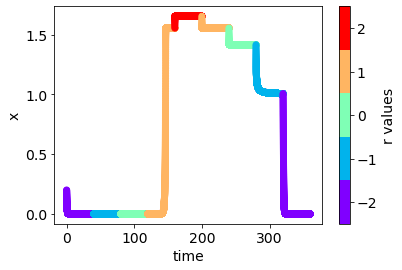

In [2]:
# Import the required modules
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

import time

def dxdt(x,t,r):
    dxdt = r*x+2*x**3-x**5;
    return dxdt

timesteps = np.arange(0,40,0.01)
x0 = 0.2  # the initial condition

# Set variables to collect later.
out_x = out_t = out_r= [];

for r in (-2,-1,0,1,2,1,0,-1,-2):

    # args must be a tuple, which is annnoying. A 1 element tuple needs a comma.
    # This doesn't effect tuples of more elements
    x = odeint(dxdt, x0, timesteps, args=(r,))

    # Collect data for plotting
    out_x = np.append(out_x,x);
    out_t = np.append(out_t,timesteps);
    out_r = np.append(out_r,[r]*len(timesteps));
    
    # Update time steps and initial conditions for next loop
    timesteps = timesteps+40;
    x0 = x[-1] + 10**-12;
    
# Plot result. Have to do some fancy foot work to get a discrete colorbar
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("x")
from matplotlib import colors
cmap = plt.cm.rainbow
norm = colors.BoundaryNorm(np.arange(-2.5,3.5,1), cmap.N)
plt.scatter(out_t, out_x, c= out_r,cmap=cmap, norm=norm);
cbar = plt.colorbar(ticks=np.linspace(-2, 3, 6))
cbar.set_label('r values');
